<a href="https://colab.research.google.com/github/cdodiya/Project/blob/main/MovieRecommendationCollaborativeFiltering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MOVIE RECOMMENDATION SYSTEM**

---



**Task 1: Import libraries**

In [ ]:
!pip3 install scikit-surprise

     |████████████████████████████████| 11.8MB 5.4MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617603 sha256=2719a4e78cb3dee5eecc0426afaadf05fe371824a05eecf27d0ba185679c3fdb
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [ ]:
import pandas as pd
from surprise import Reader, Dataset, SVD
from surprise.accuracy import rmse, mae
from surprise.model_selection import cross_validate

**Task 2: Importing Data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ratings.csv to ratings.csv


In [ ]:
df = pd.read_csv('ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
df.drop('timestamp', axis=1, inplace=True)
df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [ ]:
df.isna().sum()

userId     0
movieId    0
rating     0
dtype: int64

**Task 3: Exploratory Data Analysis**

In [ ]:
n_movies = df["movieId"].nunique()
n_users = df["userId"].nunique()
print('Number of unique movies: ',n_movies)
print('Number of unique users: ',n_users)

Number of unique movies:  9724
Number of unique users:  610


In [ ]:
available_ratings = df['rating'].count()
total_ratings = n_movies*n_users
missing_ratings = total_ratings - available_ratings
sparsity = (missing_ratings/total_ratings)*100
print('Sparsity: ',sparsity)

Sparsity:  98.30003169443864


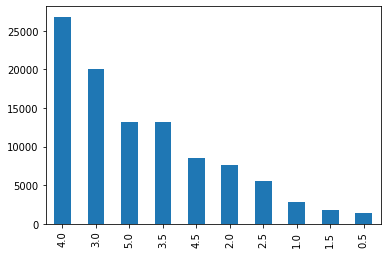

In [ ]:
df['rating'].value_counts().plot(kind = 'bar')

**Task 4: Dimensionality Reduction**

4.1 Filter movies with less than 3 ratings

In [ ]:
filter_movies = df['movieId'].value_counts() > 3
filter_movies = filter_movies[filter_movies].index.tolist()

4.2 Filter users with less than 3 movies rated

In [ ]:
filter_users = df['userId'].value_counts() > 3
filter_users = filter_users[filter_users].index.tolist()

4.3 Remove rarely rated movies and rarely rating users

In [ ]:
print('Original shape: ',df.shape)
df = df[(df['movieId'].isin(filter_movies)) & (df['userId'].isin(filter_users))]
print('New shape: ',df.shape)

Original shape:  (100836, 3)
New shape:  (92394, 3)


**Task 5: Creating Training and Test Sets**

5.1 Columns used for training

In [ ]:
cols = ['userId', 'movieId', 'rating']

5.2 Create surprise dataset

In [ ]:
reader = Reader(rating_scale = (0.5, 5))
data = Dataset.load_from_df(df[cols], reader)

5.3 Create Train set and Prediction set

In [ ]:
trainset = data.build_full_trainset()
antiset = trainset.build_anti_testset()

**Task 6: Creating and Training the model**

6.1 Creating the model


> SVD (Singular Value Decomposition)



In [ ]:
algo = SVD(n_epochs=25, verbose=True)

6.2 Training the model


> Mean Absolute Error(MAE)


> Root Mean Squared Error (RMSE)





In [ ]:
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print('>>Training done!')

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
P

**Task 7: Prediction**

7.1 Predict ratings for all pairs (user, items) that are NOT in the training set

In [ ]:
predictions = algo.test(antiset)

In [ ]:
predictions[0]

Prediction(uid=1, iid=318, r_ui=3.529119856267723, est=5, details={'was_impossible': False})

7.2 Recommending TOP 3 movies based on prediction

In [ ]:
from collections import defaultdict
def get_top_n(predictions, n):
    top_n = defaultdict(list)
    for uid, iid, _, est, _ in predictions:
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        top_n[uid] = user_ratings[:n]
    return top_n
    pass
top_n = get_top_n(predictions, n=3)
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, rating) in user_ratings])

1 [318, 720, 265]
2 [296, 7153, 1136]
3 [1223, 7361, 898]
4 [1270, 720, 56782]
5 [2028, 904, 858]
6 [720, 3967, 3275]
7 [912, 1080, 2571]
8 [112552, 720, 1204]
9 [898, 3451, 720]
10 [247, 1224, 720]
11 [720, 1197, 2019]
12 [110, 260, 356]
13 [2324, 2959, 4973]
14 [1235, 1197, 56782]
15 [1235, 50, 720]
16 [720, 1237, 1242]
17 [1223, 7361, 1266]
18 [1272, 720, 3508]
19 [858, 2028, 527]
20 [904, 1197, 1204]
21 [3451, 930, 265]
22 [3703, 750, 55276]
23 [720, 6016, 903]
24 [720, 1204, 1945]
25 [50, 296, 593]
26 [720, 2571, 3703]
27 [912, 720, 1203]
28 [720, 1223, 3000]
29 [720, 1237, 7361]
30 [2959, 720, 5618]
31 [1221, 318, 3000]
32 [858, 750, 2019]
33 [858, 910, 260]
34 [1172, 81834, 3451]
35 [318, 1193, 720]
36 [56782, 58559, 750]
37 [720, 930, 2571]
38 [1252, 1204, 4144]
39 [1172, 1252, 79132]
40 [593, 1223, 2019]
41 [1719, 1201, 720]
42 [1249, 1193, 720]
43 [6, 50, 163]
44 [4993, 318, 1196]
45 [913, 2360, 1235]
46 [1136, 3508, 260]
47 [720, 922, 898]
48 [720, 50, 2324]
49 [2329, 3451, 